# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: \ Danac, Nathan Gabriel C.
_Student No._:\ 2021-12517
_Section_: THX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** NATHAN GABRIEL C. DANAC

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [2]:
!ls drive/My\ Drive

 1CF6C7D4-8572-477F-A9FC-011622283AAA.jpeg
 202112517.jpg
 368558347_1963812437309799_6475282470010724712_n.jpg
 406EF345-02D5-4C31-9918-38B9A941F362.jpeg
 63E62B20-2594-4300-9873-74CEC37ED2EF.jpeg
 92A266EA-248D-479F-9766-FB6AED86D6C0.jpeg
 AP155
 AP157
'AY 2021-2022'
'AY 2022-2023'
 Books
 CA3D50A2-7F36-4C8B-B098-17565C15242A.jpeg
 Classroom
'Colab Notebooks'
'Copy of IMG_2082.jpg'
'Copy of Physics_108_Academic_Integrity_Statement_2023.docx'
'Copy of Physics_108_Academic_Integrity_Statement_2023.gdoc'
 CWTS
'DANAC_1_Pendular behavior of public transport networks.pdf'
'DANAC_1_Rumor Propagation is Amplified by Echo Chambers in Social Media.pdf'
'DANAC_2_Pendular behavior of public transport networks.pdf'
'DANAC_2_Rumor Propagation is Amplified by.pdf'
'DANAC - 2x2.png'
'DANAC_3_Revealing time’s secrets at the National Theatre of Costa Rica via innovative software for cultural heritage research (1).pdf'
'DANAC_3_Revealing time’s secrets at the National Theatre of Costa Rica via innovat

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/My Drive/AP157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [4]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [5]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [6]:
#Import the necessary libraries
import pandas as pd

#Create a DataFrame from the data set, which we convert into a numpy array. This workaround was added because loading the data directly into a numpy array provided an array, but some components were tuples, which prevented me from extracting features easily.
df = pd.DataFrame(data).to_numpy()

#Write a function to split the data into features and their corresponding targets
def get_features_targets(dat):
  #Split each column into a 1D array by transposing. Each column represents a feature, except for the last column, which represents the classes.
  ug, gr, ri, iz, ecc, m4u, m4g, m4r, m4i, m4z, pR50u, pR50r, pR50z, pR90u, pR90r, pR90z, c = dat.T
  #Create our desired array of features by transposing each array. For the u, r, and z bands, the ratios of different concentrations are taken as features.
  f = np.array([ug, gr, ri, iz, ecc, m4u, m4g, m4r, m4i, m4z, (pR50u/pR90u), (pR50r/pR90r), (pR50z/pR90z)]).T

  #Return the array of features, as well as the classes
  return f, c

features, targets = get_features_targets(df)
print(features.shape)
print(targets.shape)

(780, 13)
(780,)


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [7]:
#Import the necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Define a function to predict classes using a decision tree classifier
def predict_class(dat):
  #Obtain the features and the actual classes from our data set
  f, t = get_features_targets(dat)

  #Split the data set into 20% testing and 80% training
  f_train, f_test, t_train, t_test = train_test_split(f, t, test_size=0.2, train_size=0.8, random_state=99)
  #Create a decision tree classifier (DCF) from our training data set
  dcf = DecisionTreeClassifier(random_state=67).fit(f_train, t_train)

  #Use our DCF to predict the classes for our test data set
  guess = dcf.predict(f_test)

  #Return the predicted classes along with their actual classes
  return  guess, t_test

In [8]:
#Run the DCF for our data set
predicted_class, actual_class = predict_class(df)

#Compare the predicted and actual classes of each galaxy
for i in np.arange(50):
   print("%d, %s, %s" % (i, predicted_class[i], actual_class[i]))

0, spiral, merger
1, elliptical, elliptical
2, spiral, spiral
3, elliptical, elliptical
4, spiral, spiral
5, spiral, spiral
6, merger, spiral
7, merger, merger
8, merger, spiral
9, elliptical, elliptical
10, elliptical, elliptical
11, merger, merger
12, elliptical, elliptical
13, merger, merger
14, merger, merger
15, elliptical, elliptical
16, spiral, elliptical
17, merger, merger
18, merger, spiral
19, spiral, spiral
20, spiral, merger
21, spiral, spiral
22, merger, merger
23, spiral, spiral
24, elliptical, elliptical
25, spiral, spiral
26, spiral, spiral
27, spiral, spiral
28, spiral, merger
29, elliptical, elliptical
30, spiral, spiral
31, elliptical, elliptical
32, elliptical, merger
33, merger, merger
34, merger, merger
35, spiral, spiral
36, merger, merger
37, elliptical, elliptical
38, merger, merger
39, spiral, merger
40, merger, merger
41, spiral, merger
42, spiral, spiral
43, merger, merger
44, merger, merger
45, spiral, spiral
46, merger, merger
47, merger, merger
48, ellipt

#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

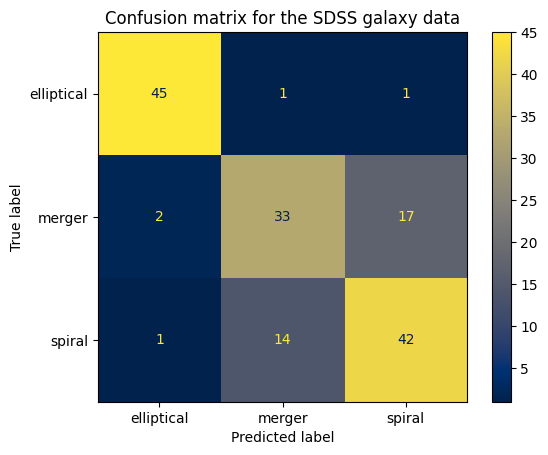

In [9]:
#Import the necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Enumerate the classes
classes = ["elliptical", "merger", "spiral"]

#Create a confuson matrix from the results of our DCF
cm = confusion_matrix(actual_class, predicted_class)

#Visualizing the confusion matrix
map = ConfusionMatrixDisplay(cm, display_labels=classes)
map.plot(cmap="cividis")
#Formatting
plt.title("Confusion matrix for the SDSS galaxy data")
#Displaying
plt.show()

From the above confusion matrix, we can see that the decision tree classifier does a good job at categorizing galaxies based on their features. Especially for elliptical galaxies, there are very few false positives. On the other hand, while it was still able to correctly distinguish the majority of merger and spiral galaxies, there is still a significant number of misclassifications for both.

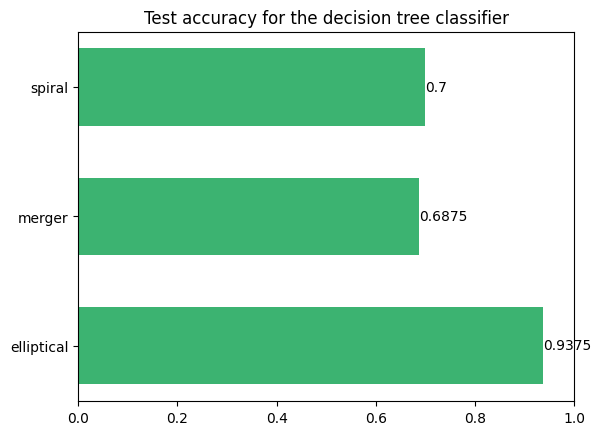

In [10]:
#Create an array to store the test accuracy for each class
acc = np.empty(3)

for i in range(3):
  #The number of true positives is represented by the diagonal
  #The total number of positives simply is the total sum of each column
  acc[i] = cm[i][i]/np.sum(cm[:, i])

#Plotting as a bar graph
b = plt.barh(classes, acc, height=0.6, color="mediumseagreen")
plt.bar_label(b)
#Formatting
plt.xlim(0, 1)
plt.title("Test accuracy for the decision tree classifier")
#Displaying
plt.show()

The test accuracy of the decision tree classifier is as follows:


*   $70.00$% for spiral galaxies
*   $68.75$% for mergers
*   $93.75$% for elliptical galaxies

It is interesting to note that the decision tree classifier struggles distinguishing spiral galaxies and mergers. Physically, these two different types of galaxies share similar features. Both have spiral arms and a central bulge. In addition, both galaxies tend to be dusty due to the formation of new stars.

On the other hand, elliptical galaxies do not have spiral arms. They have also undergone most of their star formation already, and thus, tend to be less dusty. Moreover, their morphology is relatively simple, hence their name.

Thankfully, there are key differences between these types of galaxies, such as the presence of tidal tails and ongoing starburst activity in mergers, which are typically absent in elliptical galaxies. However, these features may be difficult to extract from image data. Hence, they are difficult to consider in our data set.





# Reference
[Galaxy Details and Mergers](https://science.nasa.gov/mission/hubble/science/science-highlights/galaxy-details-and-mergers/)
